In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing essential libraries

In [0]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
import wordcloud

# Importing the processed dataset

In [0]:
DATA_PATH = '/content/drive/My Drive/ALDA-Project/processed_data.csv'

In [0]:
dataset = pd.read_csv(DATA_PATH, index_col = 0)

In [13]:
dataset.head()

,filename,Message-ID,Date,From,To,Subject,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,message_content,user
0,/home/tushar/Downloads/enron_mail_dataset/mail...,<11974165.1075855077736.JavaMail.evans@thyme>,"Wed, 17 Oct 2001 17:20:04 -0700 (PDT)",['moneyadm2@timeinc.net'],['sivy@listserv.pathfinder.com'],Sivy on Stocks: Surprise me,Sivy on Stocks <moneyadm2@TIMEINC.NET>,SIVY@LISTSERV.PATHFINDER.COM,NaN,NaN,\PKEAVEY (Non-Privileged)\Deleted Items,Keavey-P,PKEAVEY (Non-Privileged).pst,"SIVY ON STOCKS from CNNmoney.com\nOctober 17, ...",keavey-p
1,/home/tushar/Downloads/enron_mail_dataset/mail...,<21842155.1075862156117.JavaMail.evans@thyme>,"Mon, 19 Nov 2001 11:54:54 -0800 (PST)",['kimberly.bates@enron.com'],"['gary.taylor@enron.com', 'scott.neal@enron.com']",RE: meeting this afternoon,"Bates, Kimberly </O=ENRON/OU=NA/CN=RECIPIENTS/...","Neal, Scott </O=ENRON/OU=NA/CN=RECIPIENTS/CN=S...","Ames, Chuck </O=ENRON/OU=NA/CN=RECIPIENTS/CN=C...",NaN,"\PKEAVEY (Non-Privileged)\Keavey, Peter F.\Del...",Keavey-P,PKEAVEY (Non-Privileged).pst,"I apologize, but the new system had problems a...",keavey-p
2,/home/tushar/Downloads/enron_mail_dataset/mail...,<23753287.1075862153395.JavaMail.evans@thyme>,"Mon, 19 Nov 2001 05:11:28 -0800 (PST)",['carrfuturesenergy@carrfut.com'],['rvujtech@carrfut.com'],daily charts 11/19,CarrFuturesEnergy@carrfut.com@ENRON,RVujtech@carrfut.com,NaN,NaN,"\PKEAVEY (Non-Privileged)\Keavey, Peter F.\Del...",Keavey-P,PKEAVEY (Non-Privileged).pst,The information contained herein is based on s...,keavey-p
3,/home/tushar/Downloads/enron_mail_dataset/mail...,<5863182.1075855074007.JavaMail.evans@thyme>,"Mon, 22 Oct 2001 13:17:12 -0700 (PDT)",['postmaster@ftenergy.com'],['f..keavey@enron.com'],Delivered:,System Administrator <postmaster@ftenergy.com>...,"Keavey, Peter F. </O=ENRON/OU=NA/CN=RECIPIENTS...",NaN,NaN,\PKEAVEY (Non-Privileged)\Deleted Items,Keavey-P,PKEAVEY (Non-Privileged).pst,Your message\n\n To: Dowjones1 (E-mail);...,keavey-p
4,/home/tushar/Downloads/enron_mail_dataset/mail...,<10010750.1075862153524.JavaMail.evans@thyme>,"Mon, 12 Nov 2001 10:24:02 -0800 (PST)",['kimberly.bates@enron.com'],"['\r\n\tmaureen.smith@enron.com', 'andrea.ring...",FW: Meeting today with Louise,"Bates, Kimberly </O=ENRON/OU=NA/CN=RECIPIENTS/...","Vickers, Frank </O=ENRON/OU=NA/CN=RECIPIENTS/C...",NaN,NaN,"\PKEAVEY (Non-Privileged)\Keavey, Peter F.\Del...",Keavey-P,PKEAVEY (Non-Privileged).pst,\n\n -----Original Message-----\nFrom: \tSchop...,keavey-p


In [14]:
dataset.describe(include='all')

,filename,Message-ID,Date,From,To,Subject,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,message_content,user
count,517401,517401,517401,517401,495554,498214,517372,508248,128886,175,517372,517372,513229,517401,517401
unique,517401,517401,224128,20328,56236,159289,27980,73551,33700,131,5335,259,428,249025,150
top,/home/tushar/Downloads/enron_mail_dataset/mail...,<11906054.1075845250064.JavaMail.evans@thyme>,"Wed, 27 Jun 2001 16:02:00 -0700 (PDT)",['kay.mann@enron.com'],['pete.davis@enron.com'],RE:,Kay Mann,pete.davis@enron.com,"Meyers, Albert </O=ENRON/OU=NA/CN=RECIPIENTS/C...","Schwieger, Jim </O=ENRON/OU=NA/CN=RECIPIENTS/C...",\Kay_Mann_June2001_1\Notes Folders\All documents,Kaminski-V,vkamins.nsf,"As you know, Enron Net Works (ENW) and Enron G...",kaminski-v
freq,1,1,1118,16735,9155,6477,16324,5334,3106,6,6639,26995,24029,112,28465


In [15]:
columns = dataset.columns

for column in columns:
  print("{} - {}".format(column,dataset[column].nunique()))

filename - 517401
Message-ID - 517401
Date - 224128
From - 20328
To - 56236
Subject - 159289
X-From - 27980
X-To - 73551
X-cc - 33700
X-bcc - 131
X-Folder - 5335
X-Origin - 259
X-FileName - 428
message_content - 249025
user - 150


In [16]:
dataset.columns

Index(['filename', 'Message-ID', 'Date', 'From', 'To', 'Subject', 'X-From',
       'X-To', 'X-cc', 'X-bcc', 'X-Folder', 'X-Origin', 'X-FileName',
       'message_content', 'user'],
      dtype='object')

In [17]:
dataset.dtypes

filename           object
Message-ID         object
Date               object
From               object
To                 object
Subject            object
X-From             object
X-To               object
X-cc               object
X-bcc              object
X-Folder           object
X-Origin           object
X-FileName         object
message_content    object
user               object
dtype: object

In [18]:
dataset.iloc[0]['To']

"['sivy@listserv.pathfinder.com']"

## Defining Cleanup function

In [19]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import re
import spacy
spacy.load('en')
from spacy.lang.en import English
parser = English()
stop = set(stopwords.words('english'))
stop.update(("to","cc","subject","http","from","sent"))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
def clean(document):
  doc1 = document.rstrip()
  doc2 = re.sub(r'[^a-zA-Z]', ' ', doc1)
  doc3 = " ".join([i for i in doc2.lower().split() if i not in stop])
  doc4 = ''.join(ch for ch in doc3 if ch not in exclude)
  doc5 = re.sub(r"\b[a-zA-Z]\b", "", doc4)
  doc6 = " ".join(lemma.lemmatize(word) for word in doc5.split())

  return doc6

In [0]:
doc = dataset.iloc[0]['message_content']

In [22]:
clean(doc)

'sivy stock cnnmoney com october quick cash would best list keep thinking chance try win grand prize bonus see else selected best money com try issue money magazine free click www money com bestof surprise big surprise week earnings coming slightly better expected new york cnnmoney great thing unrelenting pessimism surprise likely pleasant one pretty much point investor reached sept attack expectation third quarter profit negative even mediocre report count good news fact result come past day particularly financials drug company better mediocre continue somewhat optimistic many economist believe federal reserve enormous interest rate cut fuel upturn economy rate cut would already taking effect economic damage stemming sept fear terrorism continue undermine market overshadowing faint sign improving fundamental result dow point wednesday despite several strong earnings report freddie mac fre research estimate reported percent earnings gain third quarter follows fannie mae fnm research es

## Top 10 users

In [0]:
users = dataset['user'].unique()

In [24]:
print("Total count of users: {}".format(len(users)))

Total count of users: 150


In [0]:
top_users = dataset.groupby('user').count()['filename'].sort_values(ascending=False)[:10]

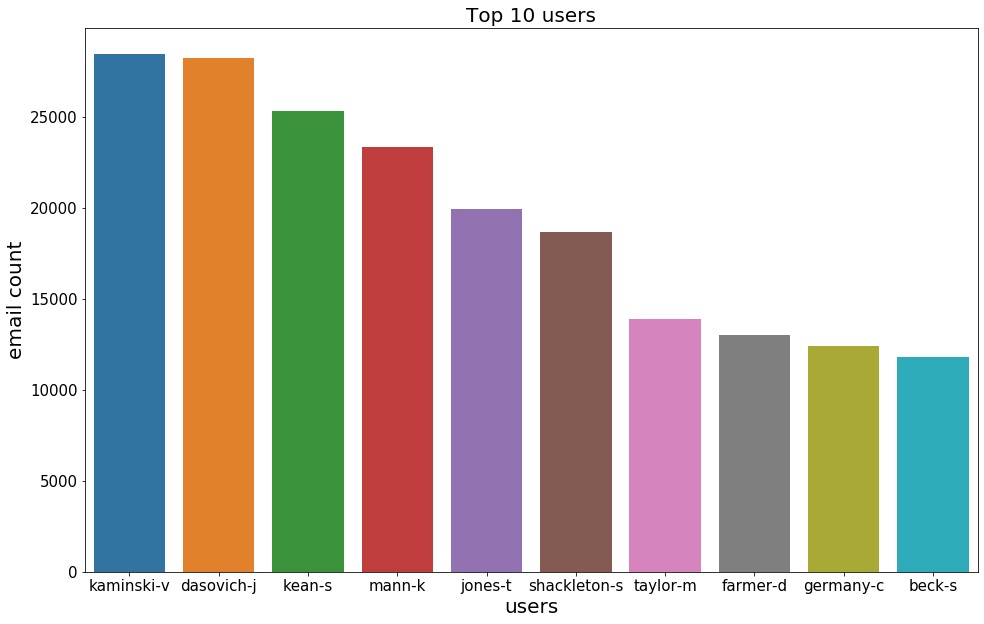

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))

ax = sns.barplot(x=top_users.index , y=top_users)
ax.axes.set_title("Top 10 users",fontsize=20)
ax.set_xlabel("users",fontsize=20)
ax.set_ylabel("email count",fontsize=20)

sns.set(style="whitegrid")
ax.tick_params(labelsize=15)
plt.savefig('/content/drive/My Drive/ALDA-Project/top10.png')
plt.show()


## Top 10 email senders

In [0]:
top_senders = dataset.groupby('From').count()['filename'].sort_values(ascending=False)[:10]

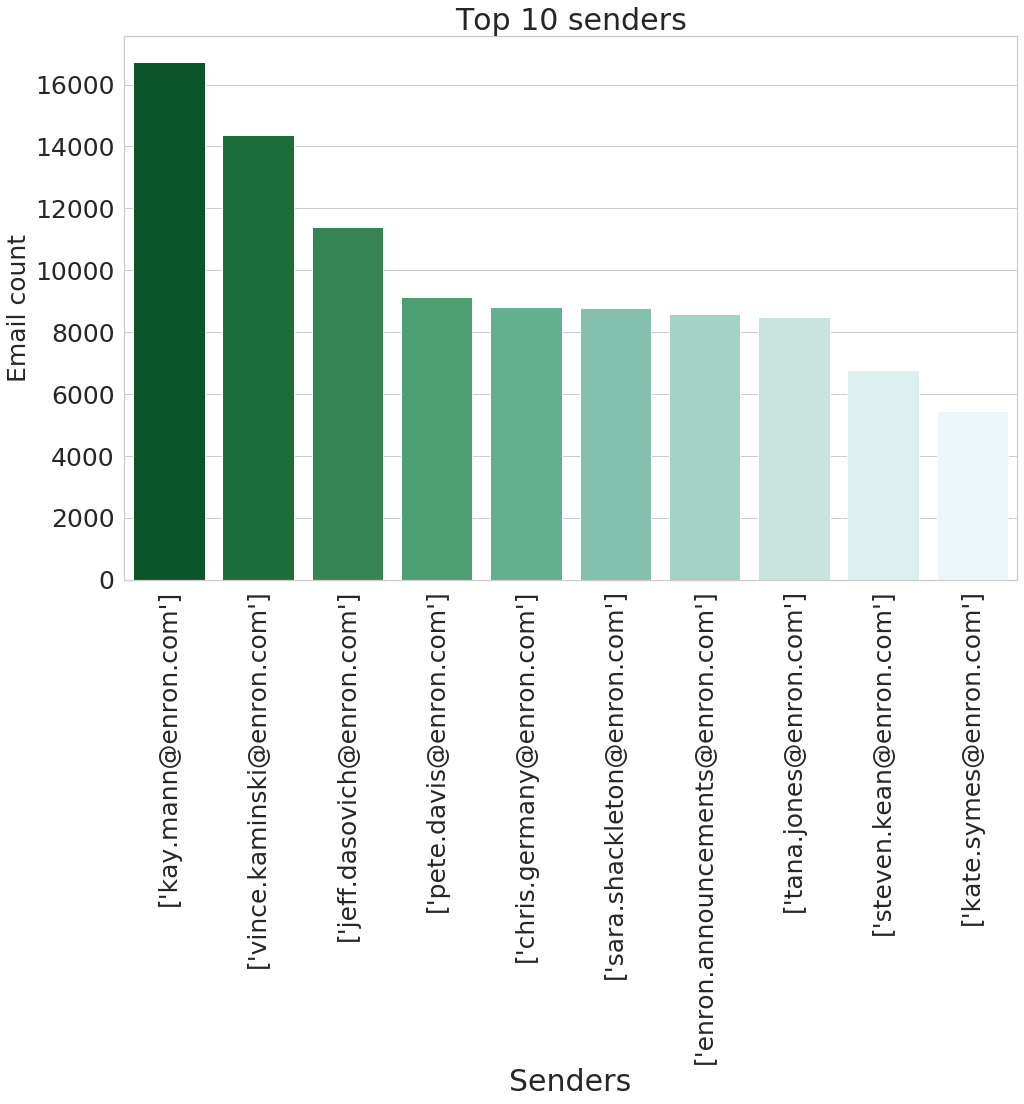

In [28]:
plt.figure(figsize=(16, 10))

ax = sns.barplot(x=top_senders.index , y=top_senders, palette='BuGn_r')
ax.axes.set_title("Top 10 senders",fontsize=30)
ax.set_xlabel("Senders",fontsize=30)
ax.set_ylabel("Email count",fontsize=25)

sns.set(style="whitegrid")
ax.tick_params(axis = 'x', labelsize=25, labelrotation = 90)
ax.tick_params(axis = 'y', labelsize=25)
plt.savefig('/content/drive/My Drive/ALDA-Project/top10senders.png')
plt.show()

## Top 10 email receivers

In [0]:
top_receivers = dataset.groupby('To').count()['filename'].sort_values(ascending=False)[:10]

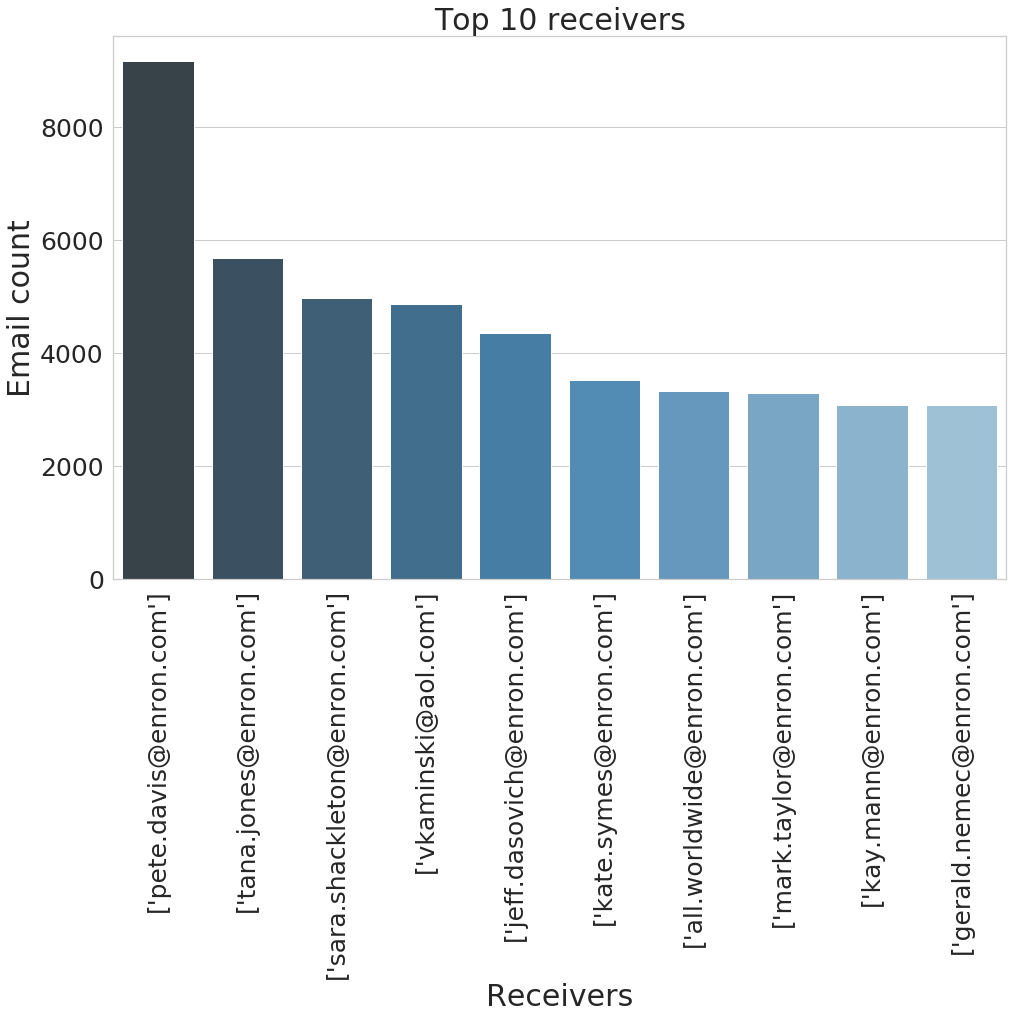

In [30]:
plt.figure(figsize=(16, 10))

ax = sns.barplot(x=top_receivers.index , y=top_receivers, palette="Blues_d")
ax.axes.set_title("Top 10 receivers",fontsize=30)
ax.set_xlabel("Receivers",fontsize=30)
ax.set_ylabel("Email count",fontsize=30)

sns.set(style="whitegrid")
ax.tick_params(axis = 'x', labelsize=25, labelrotation = 90)
ax.tick_params(axis = 'y', labelsize=25)
plt.savefig('/content/drive/My Drive/ALDA-Project/top10receivers.png')
plt.show()


## Top 10 most frequent conversation

In [31]:
TestFrame2 = dataset[['From', 'To', 'Date']].dropna()
TestFrame2 = TestFrame2.groupby(['From', 'To']).count().reset_index()
# rename column
TestFrame2.rename(columns={'Date': 'count'}, inplace=True)
print(TestFrame2.sort_values(by=['count'], ascending=False)[:10])


                                    From                              To  count
73810           ['pete.davis@enron.com']        ['pete.davis@enron.com']   9141
99327       ['vince.kaminski@enron.com']           ['vkaminski@aol.com']   4308
26916  ['enron.announcements@enron.com']     ['all.worldwide@enron.com']   2206
26909  ['enron.announcements@enron.com']       ['all.houston@enron.com']   1701
50188             ['kay.mann@enron.com']     ['suzanne.adams@enron.com']   1528
99237       ['vince.kaminski@enron.com']  ['shirley.crenshaw@enron.com']   1190
90227          ['steven.kean@enron.com']  ['maureen.mcvicker@enron.com']   1014
49949             ['kay.mann@enron.com']              ['nmann@erac.com']    980
48766           ['kate.symes@enron.com']    ['evelyn.metoyer@enron.com']    915
48813           ['kate.symes@enron.com']    ['kerri.thompson@enron.com']    859


## Splitting emails by year

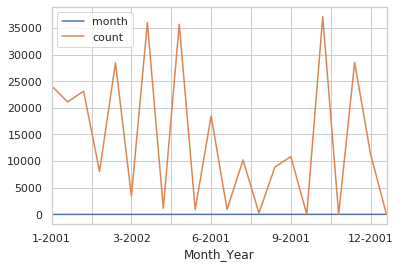

In [88]:
l[["day", "date", "month", "year" ,"time", "hours", "timezone"]] = dataset["Date"].str.split(" ", expand=True)
sub_df_topic = l.loc[l['year'].isin(['2001', '2002'])]

dsf = (sub_df_topic.groupby(['month','year'])).size().reset_index(name='count')
dsf["month"] = pd.to_datetime(dsf.month, format='%b', errors='coerce').dt.month
#dsf.sort_values(by=['year'])
dsf.sort_values(['month', 'year'], ascending=[True, True], inplace=True)
dsf['Month_Year'] = dsf[['month', 'year']].astype(str).apply('-'.join, axis=1)
dsf.plot(x = "Month_Year")
#dsf.set_xlabel('Year', fontsize=18)
#dsf.set_ylabel('N emails', fontsize=18)

In [84]:
l[["day", "date", "month", "year" ,"time", "hours", "timezone"]] = dataset["Date"].str.split(" ", expand=True)
sub_df_topic = l.loc[l['year'].isin(['2001', '2002'])]

dsf = (sub_df_topic.groupby(['month','year'])).size().reset_index(name='count')
#dsf.sort_values(by=['year'])
dsf["month"] = pd.to_datetime(dsf.month, format='%b', errors='coerce').dt.month
#dsf = dsf.sort_values(by="month")
dsf.sort_index(by=['month', 'year'], ascending=[True, True])
dsf

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


,month,year,count
0,4,2001,35995
1,4,2002,1157
2,8,2001,8897
3,12,2001,11318
4,12,2002,1
5,2,2001,23139
6,2,2002,8066
7,1,2001,24123
8,1,2002,21111
9,7,2001,10223


In [62]:
l[["day", "date", "month", "year" ,"time", "hours", "timezone"]] = dataset["Date"].str.split(" ", expand=True)
sub_df_topic = l.loc[l['year'].isin(['2001', '2002'])]
(sub_df_topic.groupby(['month','year'])).size().sort_values(ascending=False).reset_index(name='count')

,month,year,count
0,Oct,2001,37100
1,Apr,2001,35995
2,May,2001,35692
3,Nov,2001,28541
4,Mar,2001,28441
5,Jan,2001,24123
6,Feb,2001,23139
7,Jan,2002,21111
8,Jun,2001,18487
9,Dec,2001,11318


year
2001    58019
2000    38023
2002     3076
1999     1638
1997      436
1979      155
0001       33
2004        2
1998        2
Name: date, dtype: int64


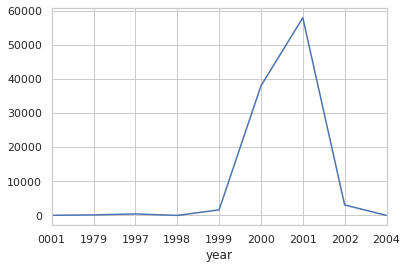

In [58]:
TestFrame2[["day", "date", "month", "year" ,"time", "hours", "timezone"]] = dataset["Date"].str.split(" ", expand=True) 
activity_per_year = TestFrame2.groupby(['year']).count()['date'].sort_values(ascending=False)
print(activity_per_year)
TestFrame2.groupby(['year'])['day'].count().plot()

year
2001    58019
2000    38023
2002     3076
1999     1638
1997      436
1979      155
0001       33
2004        2
1998        2
Name: date, dtype: int64


Text(0, 0.5, 'N emails')

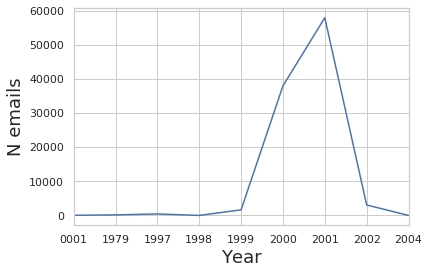

In [34]:
TestFrame2[["day", "date", "month", "year" ,"time", "hours", "timezone"]] = dataset["Date"].str.split(" ", expand=True) 
activity_per_year = TestFrame2.groupby(['year']).count()['date'].sort_values(ascending=False)
print(activity_per_year)
ax = TestFrame2.groupby(['year'])['day'].count().plot()
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('N emails', fontsize=18)

In [33]:
activity_per_year.year

AttributeError: ignored

In [0]:
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

## Word Cloud For Email Subject 

In [0]:
subjects = ' '.join(map(str, dataset['Subject'].dropna()))
fig, ax = plt.subplots(figsize=(16, 12))
wc = wordcloud.WordCloud(width=800, 
                         height=600, 
                         max_words=200,
                         stopwords=ENGLISH_STOP_WORDS).generate(subjects)
ax.imshow(wc)
ax.axis("off")

## Word Cloud for Email Content

In [0]:
content = ' '.join(map(str, dataset['message_content']))
fig, ax = plt.subplots(figsize=(16, 12))
wc = wordcloud.WordCloud(width=800, 
                         height=600, 
                         max_words=200,
                         stopwords=ENGLISH_STOP_WORDS).generate(subjects)
ax.imshow(wc)
ax.axis("off")

## Pairs with most emails 

In [0]:
def listifyString(element):
  return element.strip('][\'').split(',')

In [0]:
ftd = dataset[['From', 'To', 'Date']].dropna()
ftd = ftd.loc[ftd['To'].map(listifyString).map(len) == 1]
ftd = ftd.loc[ftd['To'] != ftd['From']]
ftd = ftd.groupby(['From', 'To']).count().reset_index()

# rename column
ftd.rename(columns={'Date': 'count'}, inplace=True)
ftd.sort_values('count', ascending=False).head(10)

## Top 10 who received mails from outside of Enron


In [0]:
def fromOutsideEnron(element):
  return element[0].endswith('@enron.com')

In [0]:
sub_df = dataset[['From', 'To']].dropna()
sub_df = sub_df[~sub_df['From'].map(listifyString).map(fromOutsideEnron)]

sub_df = sub_df.loc[sub_df['To'].map(listifyString).map(len) == 1]

sub_df = sub_df.groupby(['To']).count().reset_index()

sub_df.rename(columns={'From': 'count'}, inplace=True)
td = sub_df.sort_values('count', ascending=False).head(10)

In [0]:
#td = sub_df.['filename'].sort_values(ascending=False)[:10]#sort_values('count', ascending=False).head(10)
plt.figure(figsize=(16, 10))

ax = sns.barplot(x=td['To'] , y=td['count'], palette="Blues_d")
ax.axes.set_title("Top 10 receivers receiving email from outside Enron",fontsize=30)
ax.set_xlabel("Receivers",fontsize=30)
ax.set_ylabel("Email count",fontsize=30)

sns.set(style="whitegrid")
ax.tick_params(axis = 'x', labelsize=25, labelrotation = 90)
ax.tick_params(axis = 'y', labelsize=25)
plt.savefig('/content/drive/My Drive/ALDA-Project/top10receiversfromoutside.png')
plt.show()